# Imports

In [1]:
import pandas as pd
import numpy as np
import math

# models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor, XGBClassifier

# processing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# config
def make_report(y_pred , y_true):
    print ("")
    print ("Classification Report: ")
    print (classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.show()
    
def reg_report(true, pred, name='Test', is_print = True):
    acc = ((pred<=true*1.1) & (true*0.9<=pred)).mean()
    rmse = mean_squared_error(true, pred, squared=False)
    if is_print:
        print("\n{} Results :\n".format(name))
        print('RMSE :',rmse)
        print('Accuracy with 5% :', acc)
    return rmse, acc

def eval_report(y_train, pred_train,y_test, pred_test,is_print = True):
    train_rmse, train_acc = reg_report(y_train, pred_train,is_print=is_print, name='Train',)
    test_rmse, test_acc = reg_report(y_test, pred_test,is_print=is_print, name='Test')
    return train_rmse, train_acc, test_rmse, test_acc
pd.set_option('display.max_columns', 50)
path = 'datasets/University/datamining q26/'

# Load Data

In [2]:
train = pd.read_csv(path+'training_data.csv')
test = pd.read_csv(path+'tournament_data.csv')
test = test[test.data_type == 'validation']
print(train.shape)
print(test.shape)
feats = train.columns[3:-2]
train['label'] = train['target']*4
test['label'] = test['target']*4
train['label_2vsA'] = (train['label']==2)*1
test['label_2vsA'] = (test['label']==21)*1
train.head()

(501808, 314)
(137779, 314)


id   era data_type  feature_intelligence1  \
0  n000315175b67977  era1     train                   0.00   
1  n0014af834a96cdd  era1     train                   0.00   
2  n001c93979ac41d4  era1     train                   0.25   
3  n0034e4143f22a13  era1     train                   1.00   
4  n00679d1a636062f  era1     train                   0.25   

   feature_intelligence2  feature_intelligence3  feature_intelligence4  \
0                   0.50                   0.25                   0.00   
1                   0.00                   0.00                   0.25   
2                   0.50                   0.25                   0.25   
3                   0.00                   0.00                   0.50   
4                   0.25                   0.25                   0.25   

   feature_intelligence5  feature_intelligence6  feature_intelligence7  \
0                    0.5                   0.25                   0.25   
1                    0.5                   0.00                   0.00   
2                    1.0                   0.75                   0.75   
3                    0.5                   0.25                   0.25   
4                    0.0                   0.25                   0.50   

   feature_intelligence8  feature_intelligence9  feature_intelligence10  \
0                   0.25                   0.75                    0.75   
1                   0.25                   0.50                    0.50   
2                   0.25                   0.00                    0.25   
3                   0.75                   0.25                    0.50   
4                   0.25                   0.25                    0.50   

   feature_intelligence11  feature_intelligence12  feature_charisma1  \
0                    0.25                    0.25               1.00   
1                    0.00                    0.50               0.00   
2                    0.50                    1.00               0.50   
3                    0.50                    0.50               0.75   
4                    0.25                    0.25               0.75   

   feature_charisma2  feature_charisma3  feature_charisma4  feature_charisma5  \
0               0.75                0.5                1.0                0.5   
1               0.50                0.5                0.5                0.5   
2               0.75                0.5                0.5                1.0   
3               0.50                1.0                0.5                0.5   
4               0.50                0.0                0.5                0.5   

   feature_charisma6  feature_charisma7  feature_charisma8  feature_charisma9  \
0               0.00               0.50               0.50               0.00   
1               0.50               0.25               0.25               0.50   
2               0.50               0.50               0.50               0.25   
3               0.00               1.00               0.00               0.75   
4               0.25               0.00               0.50               0.00   

   feature_charisma10  ...  feature_wisdom25  feature_wisdom26  \
0                 0.0  ...              0.25              0.50   
1                 0.0  ...              1.00              0.25   
2                 0.0  ...              0.00              0.50   
3                 0.0  ...              0.75              1.00   
4                 0.5  ...              0.50              0.75   

   feature_wisdom27  feature_wisdom28  feature_wisdom29  feature_wisdom30  \
0              1.00              0.75              0.50              0.50   
1              0.75              1.00              0.25              0.25   
2              0.75              0.00              1.00              0.50   
3              0.75              1.00              0.75              1.00   
4              0.75              0.50              0.75              0.25   

   feature_wisdom31  feature_wisdom3

# EDA

<AxesSubplot:>

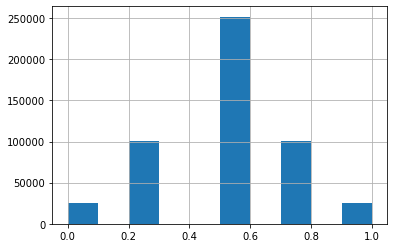

In [31]:
train.target.hist()

<AxesSubplot:>

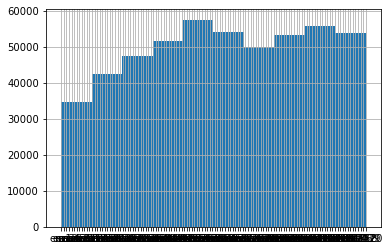

In [8]:
train.era.hist()

In [3]:
cor = train.corr()

In [8]:
display(cor['target'].sort_values()[:-2])

feature_dexterity7    -0.012175
feature_dexterity6    -0.011807
feature_dexterity4    -0.011706
feature_charisma69    -0.010858
feature_dexterity11   -0.010820
                         ...   
feature_charisma18     0.010509
feature_charisma19     0.010543
feature_charisma37     0.010719
feature_strength14     0.011353
feature_strength34     0.012310
Name: target, Length: 311, dtype: float64

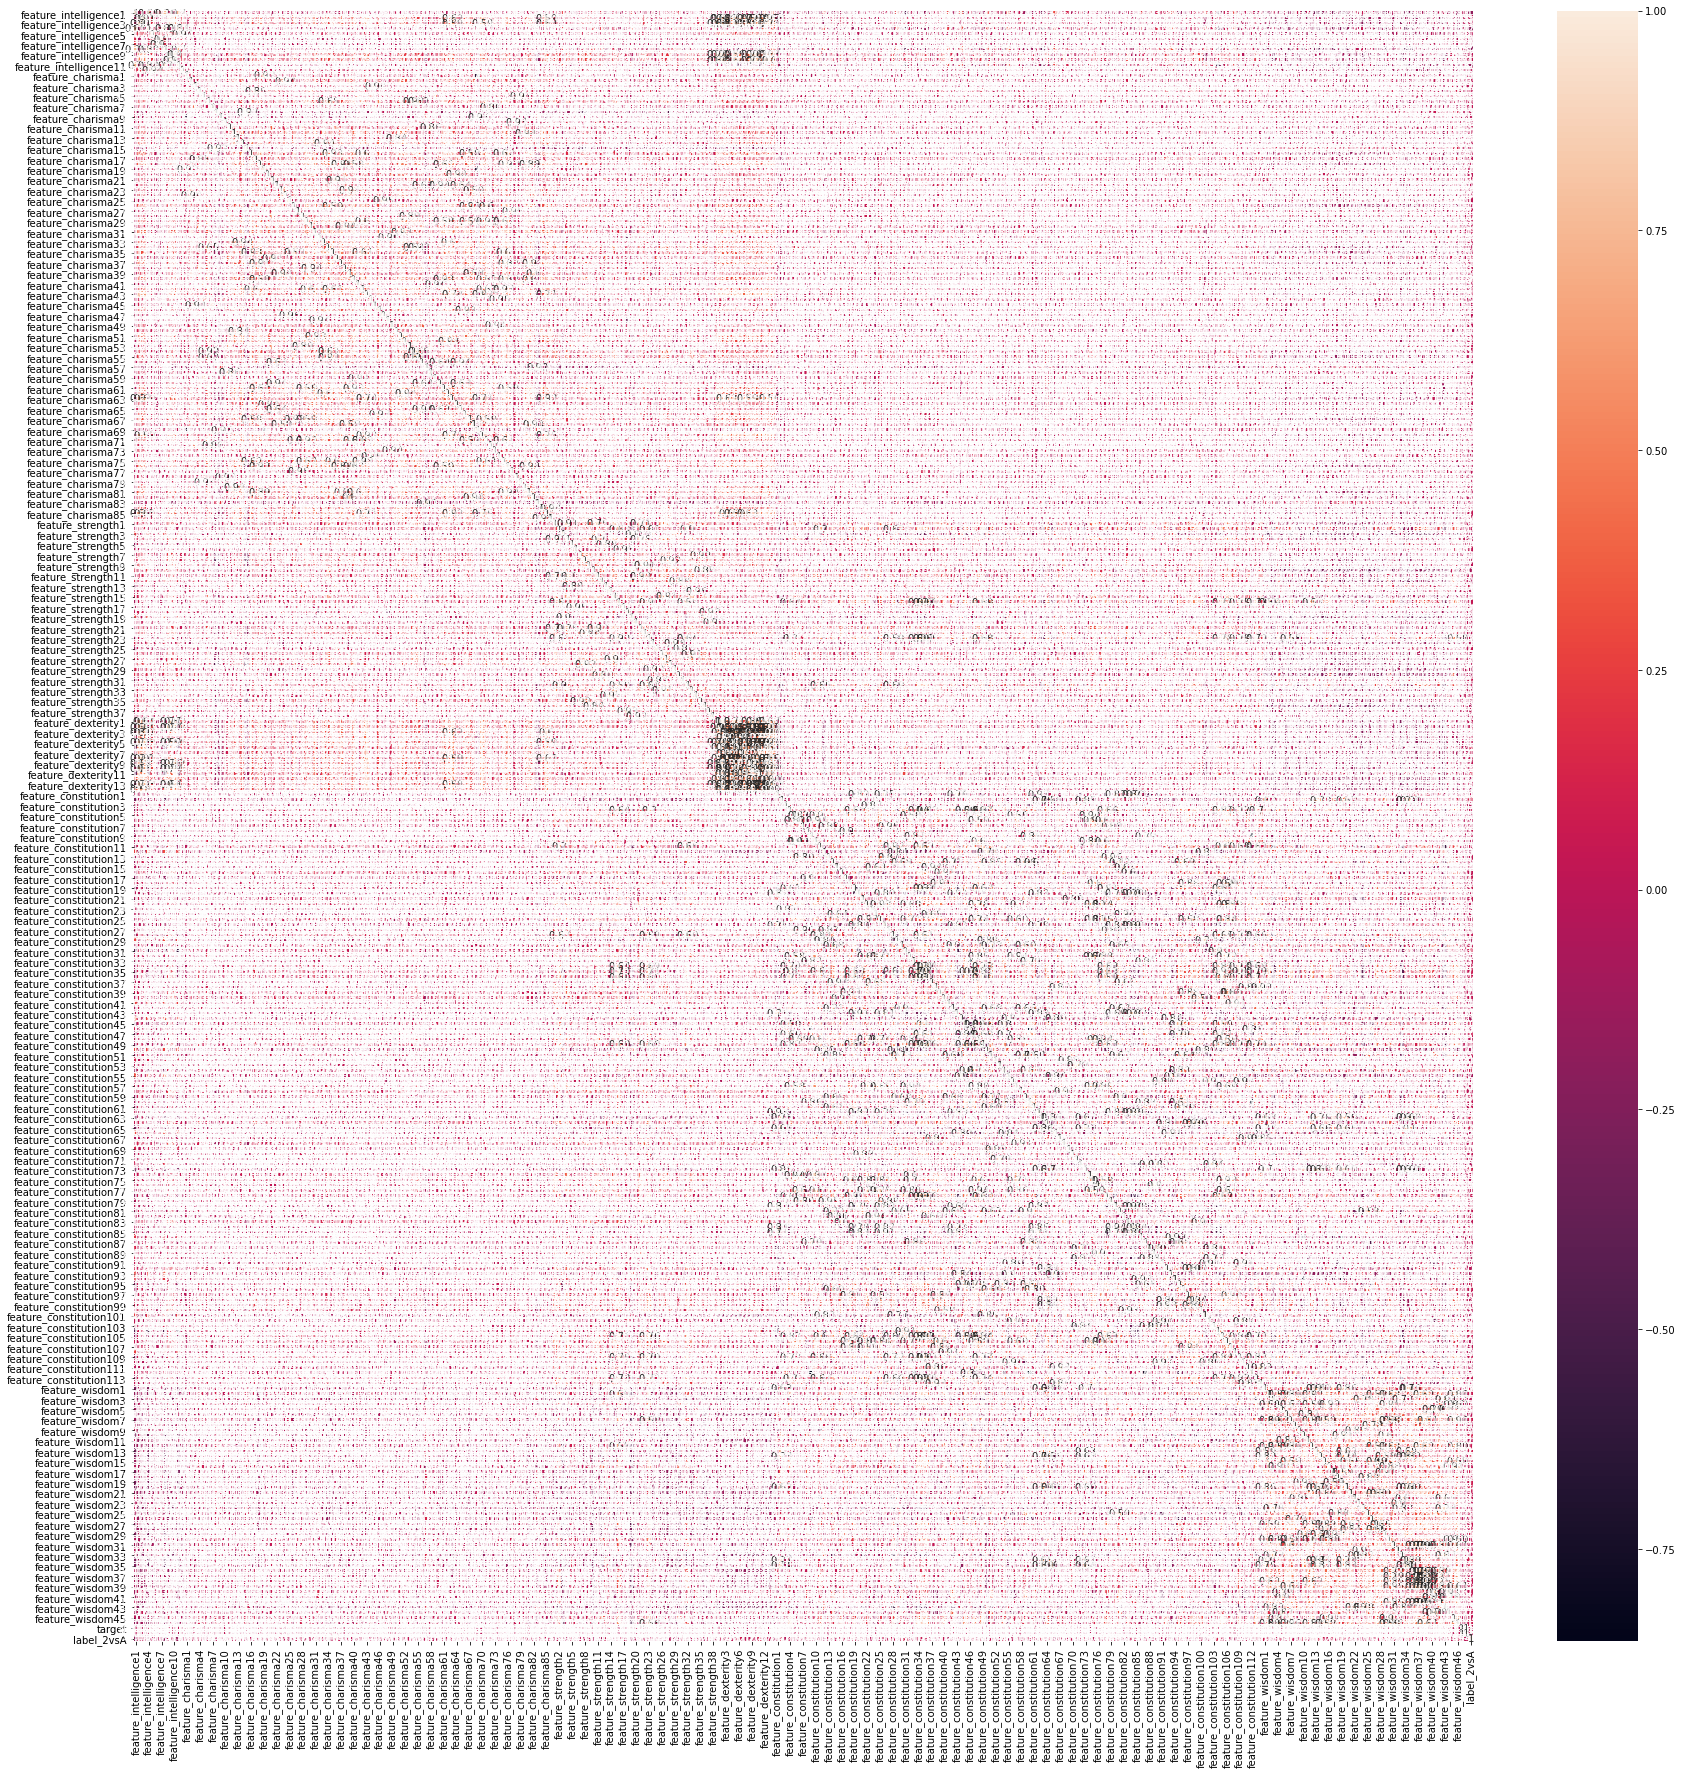

In [53]:
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=True)
plt.savefig(path+'corrall.jpg')
plt.show()

In [36]:
def func(x):
    for i in range(10):
        x = x.replace(str(i), '')
    return x
kind = set(map(func,feats.values))
print(kind)

{'feature_dexterity', 'feature_constitution', 'feature_intelligence', 'feature_strength', 'feature_wisdom', 'feature_charisma'}


In [37]:
result = {}
for k in kind:
    l = []
    for feat in feats:
        if k in feat:
            l.append(feat)
    result[k] = l


In [47]:
new_train = pd.DataFrame(columns = ['feature_dexterity', 'feature_constitution', 'feature_intelligence', 'feature_strength', 'feature_wisdom', 'feature_charisma'])
new_test = pd.DataFrame(columns = ['feature_dexterity', 'feature_constitution', 'feature_intelligence', 'feature_strength', 'feature_wisdom', 'feature_charisma'])
for k in kind:
    new_train[k] = train[result[k]].mean(axis = 1)
    new_test[k] = test[result[k]].mean(axis = 1)
    
new_train['label'] = train['label']
new_test['label'] = test['label']

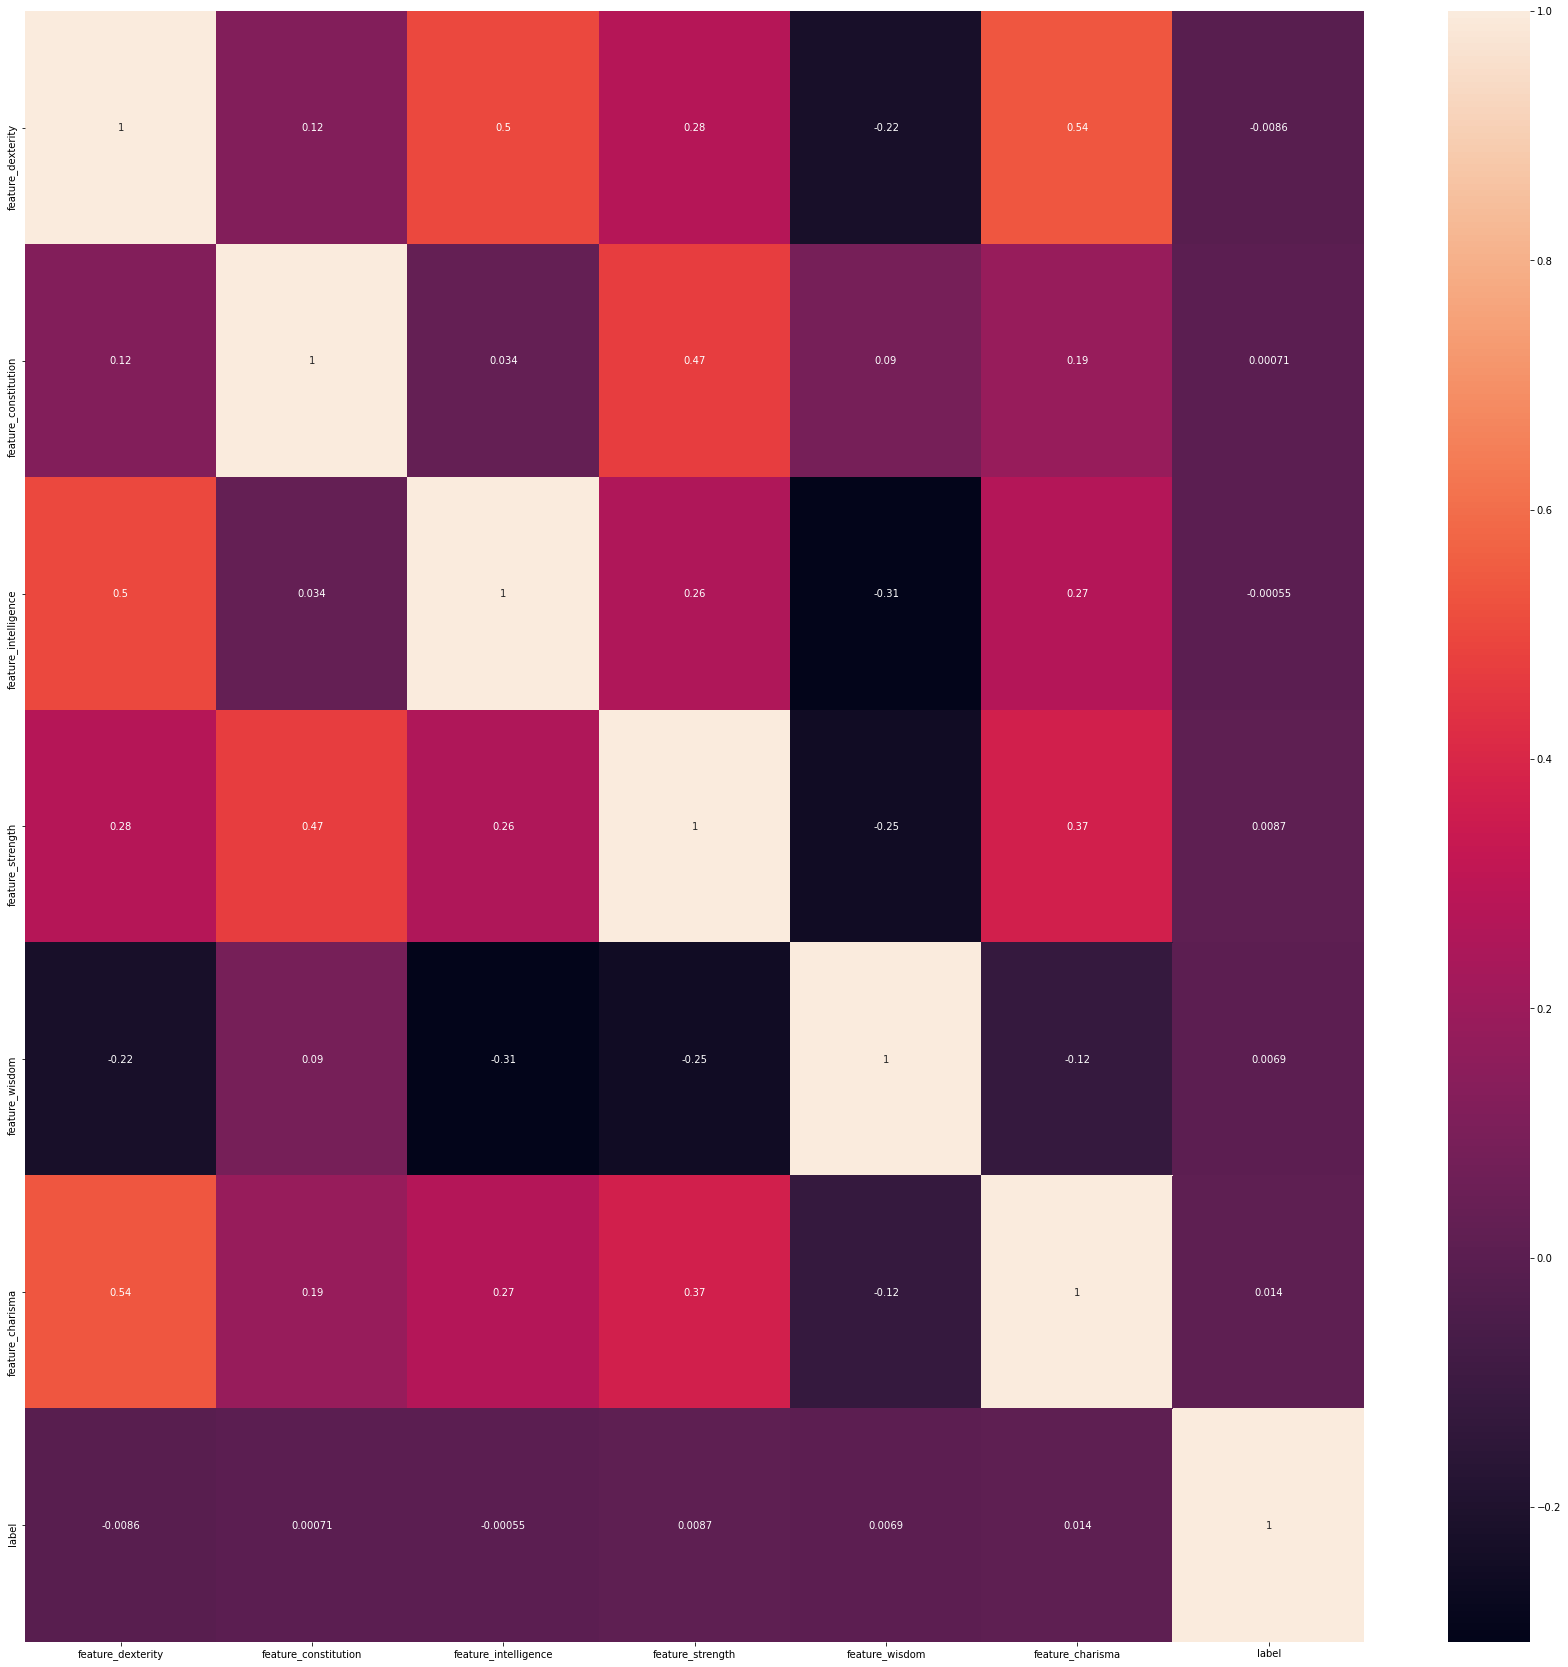

In [49]:
plt.figure(figsize=(30,30))
sns.heatmap(new_train.corr(), annot=True)
plt.savefig(path+'corr.jpg')
plt.show()


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.09      0.00      0.00      6879
         1.0       0.21      0.00      0.01     27531
         2.0       0.50      1.00      0.67     68954
         3.0       0.21      0.00      0.01     27533
         4.0       0.16      0.00      0.00      6882

    accuracy                           0.50    137779
   macro avg       0.23      0.20      0.14    137779
weighted avg       0.35      0.50      0.34    137779



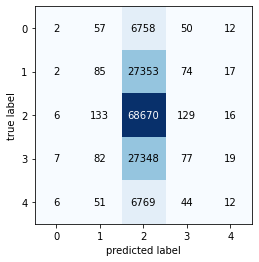

In [52]:
clf = CatBoostClassifier(verbose=0)
clf.fit(new_train.drop('label', axis =1), new_train['label'])
pred = clf.predict(new_test.drop('label', axis =1))
make_report(pred, new_test['label'])

well f#@k 

In [54]:
print(train[train.label == 0].shape)
print(train[train.label == 1].shape)
print(train[train.label == 2].shape)
print(train[train.label == 3].shape)
print(train[train.label == 4].shape)

(25016, 316)
(100053, 316)
(251677, 316)
(100045, 316)
(25017, 316)



Classification Report: 
              precision    recall  f1-score   support

         0.0       0.23      0.00      0.01      6879
         1.0       0.21      0.02      0.04     27531
         2.0       0.51      0.97      0.67     68954
         3.0       0.22      0.02      0.03     27533
         4.0       0.22      0.00      0.01      6882

    accuracy                           0.50    137779
   macro avg       0.28      0.20      0.15    137779
weighted avg       0.36      0.50      0.35    137779



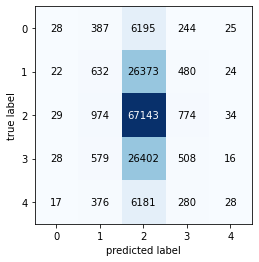

In [24]:
clf = RandomForestClassifier()
clf.fit(train[feats], train['label'])
pred = clf.predict(test[feats])
make_report(pred, test['label'])

<AxesSubplot:>

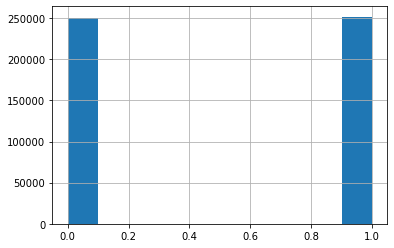

In [27]:
train.label_2vsA.hist()


Classification Report: 


E:\ProgramData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ProgramData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ProgramData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.49      0.66    137779
           1       0.00      0.00      0.00         0

    accuracy                           0.49    137779
   macro avg       0.50      0.25      0.33    137779
weighted avg       1.00      0.49      0.66    137779



E:\ProgramData\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


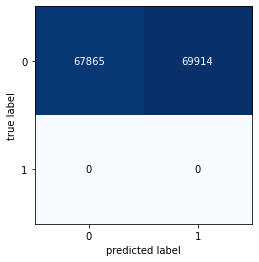

In [28]:
clf = CatBoostClassifier(verbose=0)
clf.fit(train[feats], train['label_2vsA'])
pred = clf.predict(test[feats])
make_report(pred, test['label_2vsA'])

In [40]:
f = pd.DataFrame(clf.feature_importances_)
f['feature'] = feats
new_feat = f.sort_values(0)[-20:].feature.values


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.21      0.01      0.01      6879
         1.0       0.22      0.00      0.01     27531
         2.0       0.50      1.00      0.67     68954
         3.0       0.22      0.00      0.01     27533
         4.0       0.19      0.00      0.01      6882

    accuracy                           0.50    137779
   macro avg       0.27      0.20      0.14    137779
weighted avg       0.36      0.50      0.34    137779



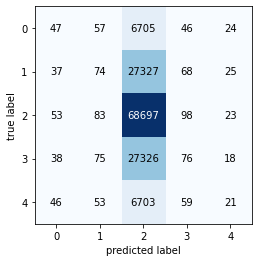

In [42]:
clf = CatBoostClassifier(verbose=0)
clf.fit(train[new_feat], train['label'])
pred = clf.predict(test[new_feat])
make_report(pred, test['label'])

In [3]:
clf = XGBRegressor(max_depth =5, learning_rate =0.01, n_estimators=2000, colsample_bytree = 0.1 )
clf.fit(train[feats], train['target'])
pred = clf.predict(test[feats])

(array([9.0000e+00, 9.6000e+01, 8.2000e+02, 7.3960e+03, 3.8601e+04,
        5.7046e+04, 2.7143e+04, 5.9160e+03, 7.2000e+02, 3.2000e+01]),
 array([0.42878836, 0.44210118, 0.45541403, 0.46872684, 0.4820397 ,
        0.4953525 , 0.5086653 , 0.52197814, 0.535291  , 0.54860383,
        0.56191665], dtype=float32),
 <BarContainer object of 10 artists>)

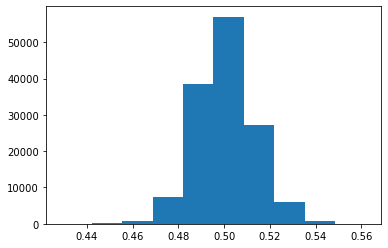

In [28]:
plt.hist(pred)

E:\ProgramData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\ProgramData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report: 


E:\ProgramData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ProgramData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      6879
         1.0       0.00      0.00      0.00     27531
         2.0       0.50      1.00      0.67     68954
         3.0       0.00      0.00      0.00     27533
         4.0       0.00      0.00      0.00      6882

    accuracy                           0.50    137779
   macro avg       0.10      0.20      0.13    137779
weighted avg       0.25      0.50      0.33    137779



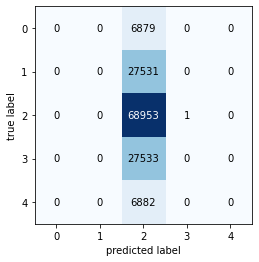

In [43]:
clf = LogisticRegression()
clf.fit(train[new_feat], train['label'])
pred = clf.predict(test[new_feat])
make_report(pred, test['label'])

E:\ProgramData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.66    137779
           1       0.00      0.00      0.00         0

    accuracy                           0.50    137779
   macro avg       0.50      0.25      0.33    137779
weighted avg       1.00      0.50      0.66    137779



E:\ProgramData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ProgramData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ProgramData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ProgramData\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value 

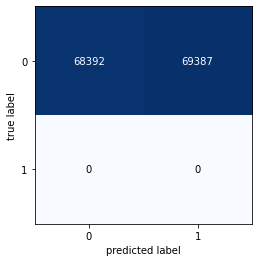

In [45]:
clf = LogisticRegression()
clf.fit(train[feats], train['label_2vsA'])
pred = clf.predict(test[feats])
make_report(pred, test['label_2vsA'])

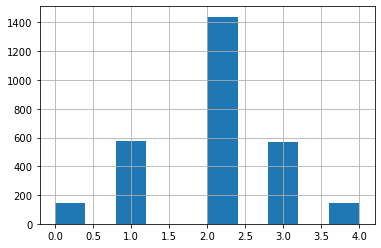

(2875, 316)


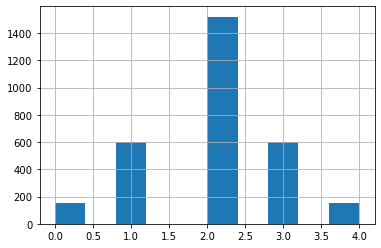

(3026, 316)


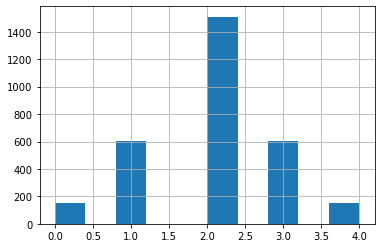

(3018, 316)


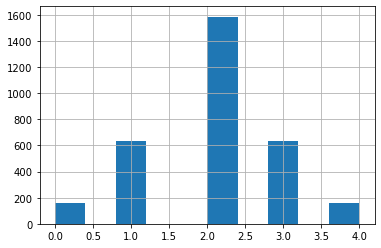

(3171, 316)


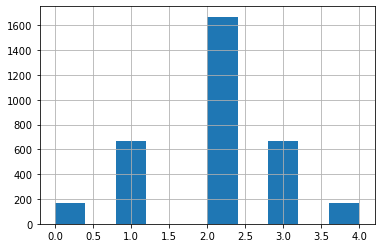

(3336, 316)


In [51]:
for e in train.era.unique()[5:10]:
    train[train.era == e].label.hist()
    plt.show()
    print(train[train.era == e].shape)

In [17]:
train[train.era == 'era1']

id   era data_type  feature_intelligence1  \
0     n000315175b67977  era1     train                   0.00   
1     n0014af834a96cdd  era1     train                   0.00   
2     n001c93979ac41d4  era1     train                   0.25   
3     n0034e4143f22a13  era1     train                   1.00   
4     n00679d1a636062f  era1     train                   0.25   
...                ...   ...       ...                    ...   
2403  nff8c4db7e8c26ab  era1     train                   0.75   
2404  nffaef40da241883  era1     train                   0.50   
2405  nffd795bbc001447  era1     train                   0.75   
2406  nfff8f6044464a9e  era1     train                   0.75   
2407  nffff520391f69ad  era1     train                   0.50   

      feature_intelligence2  feature_intelligence3  feature_intelligence4  \
0                      0.50                   0.25                   0.00   
1                      0.00                   0.00                   0.25   
2                      0.50                   0.25                   0.25   
3                      0.00                   0.00                   0.50   
4                      0.25                   0.25                   0.25   
...                     ...                    ...                    ...   
2403                   0.00                   0.00                   1.00   
2404                   1.00                   0.75                   0.25   
2405                   0.50                   0.50                   0.50   
2406                   0.50                   0.50                   0.75   
2407                   0.50                   0.50                   0.50   

      feature_intelligence5  feature_intelligence6  feature_intelligence7  \
0                      0.50                   0.25                   0.25   
1                      0.50                   0.00                   0.00   
2                      1.00                   0.75                   0.75   
3                      0.50                   0.25                   0.25   
4                      0.00                   0.25                   0.50   
...                     ...                    ...                    ...   
2403                   1.00                   1.00                   0.75   
2404                   1.00                   1.00                   1.00   
2405                   0.50                   0.25                   0.25   
2406                   0.75                   0.25                   0.50   
2407                   0.50                   0.00                   0.25   

      feature_intelligence8  feature_intelligence9  feature_intelligence10  \
0                      0.25                   0.75                    0.75   
1                      0.25                   0.50                    0.50   
2                      0.25                   0.00                    0.25   
3                      0.75                   0.25                    0.50   
4                      0.25                   0.25                    0.50   
...                     ...                    ...                     ...   
2403                   1.00                   0.00                    0.00   
2404                   0.00                   0.75                    1.00   
2405                   0.25                   0.75                    0.75   
2406                   0.50                   0.50                    0.50   
2407                   0.50                   0.50                    0.50   

      feature_intelligence11  feature_intelligence12  feature_charisma1  \
0                       0.25                    0.25               1.00   
1                       0.00                    0.50               0.00   
2                       0.50                    1.00               0.50   
3                       0.50                    0.50               0.75   
4                       0.25                    0.25               0.75   
..

In [8]:
test.era.unique()

array(['era121', 'era122', 'era123', 'era124', 'era125', 'era126',
       'era127', 'era128', 'era129', 'era130', 'era131', 'era132',
       'era197', 'era198', 'era199', 'era200', 'era201', 'era202',
       'era203', 'era204', 'era205', 'era206', 'era207', 'era208',
       'era209', 'era210', 'era211', 'era212'], dtype=object)

In [21]:
clf = DecisionTreeRegressor()
clf.fit(train[train.era == 'era1'][feats], train[train.era == 'era1']['target'])
pred = clf.predict(train[train.era == 'era2'][feats])
make_report(pred*4, train[train.era == 'era2']['label'])

In [74]:
feats = train.columns[3:-3]

In [58]:
train[(train.label==0) | (train.label==4)]

id     era data_type  feature_intelligence1  \
12      n00d8f184e5b24e8    era1     train                   1.00   
14      n011ecdf8e5491eb    era1     train                   0.50   
33      n02ad35bb1903b21    era1     train                   0.75   
34      n02c9146bba8182c    era1     train                   0.75   
44      n03a4981030f4016    era1     train                   0.75   
...                  ...     ...       ...                    ...   
501762  nfdc86c866cd6a7a  era120     train                   1.00   
501763  nfdca18be7894d4d  era120     train                   1.00   
501771  nfe01f24f7210e81  era120     train                   1.00   
501790  nfee4380e815f087  era120     train                   0.25   
501795  nff05523e8f6f181  era120     train                   1.00   

        feature_intelligence2  feature_intelligence3  feature_intelligence4  \
12                       0.00                   0.00                   1.00   
14                       0.25                   0.25                   0.50   
33                       0.50                   0.50                   0.75   
34                       0.00                   0.00                   0.75   
44                       0.50                   0.50                   0.75   
...                       ...                    ...                    ...   
501762                   0.00                   0.00                   1.00   
501763                   0.00                   0.00                   1.00   
501771                   0.00                   0.00                   1.00   
501790                   1.00                   1.00                   0.25   
501795                   0.00                   0.00                   1.00   

        feature_intelligence5  feature_intelligence6  feature_intelligence7  \
12                       0.25                   0.50                   0.75   
14                       0.75                   0.50                   0.50   
33                       0.00                   1.00                   1.00   
34                       0.25                   0.50                   0.50   
44                       1.00                   0.75                   0.50   
...                       ...                    ...                    ...   
501762                   0.50                   0.75                   0.75   
501763                   1.00                   1.00                   1.00   
501771                   0.50                   0.75                   0.75   
501790                   0.50                   0.75                   0.75   
501795                   0.00                   1.00                   1.00   

        feature_intelligence8  feature_intelligence9  feature_intelligence10  \
12                       0.75                   0.50                    0.50   
14                       0.50                   0.50                    0.50   
33                       0.50                   0.25                    0.25   
34                       0.75                   0.00                    0.00   
44                       0.75                   0.50                    0.50   
...                       ...                    ...                     ...   
501762                   1.00                   0.50                    0.75   
501763                   1.00                   1.00                    1.00   
501771                   1.00                   0.50                    0.50   
501790                   0.50                   1.00                    1.00   
501795                   1.00                   0.00                    0.00   

        feature_intelligence11  feature_intelligence12  feature_charisma1  \
12                        1.00                    0.25               0.00   
14                        0.25                    0.75               0.25   
33                        0.75                    0.00               0.75   
34                        


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50      6879
         4.0       0.50      0.51      0.51      6882

    accuracy                           0.50     13761
   macro avg       0.50      0.50      0.50     13761
weighted avg       0.50      0.50      0.50     13761



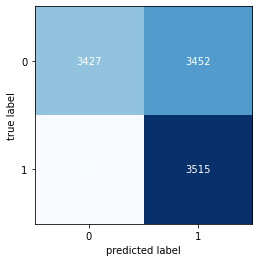

In [75]:
clf = DecisionTreeClassifier()
clf.fit(train[(train.label==0) | (train.label==4)][feats], train[(train.label==0) | (train.label==4)]['label'])
pred = clf.predict(test[(test.label==0) | (test.label==4)][feats])
make_report(pred, test[(test.label==0) | (test.label==4)]['label'])


Classification Report: 
              precision    recall  f1-score   support

         1.0       0.50      0.49      0.50     27531
         3.0       0.50      0.50      0.50     27533

    accuracy                           0.50     55064
   macro avg       0.50      0.50      0.50     55064
weighted avg       0.50      0.50      0.50     55064



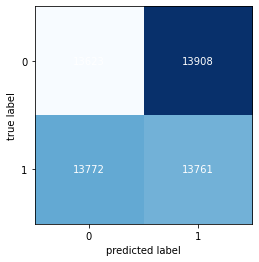

In [76]:
clf = DecisionTreeClassifier()
clf.fit(train[(train.label==1) | (train.label==3)][feats], train[(train.label==1) | (train.label==3)]['label'])
pred = clf.predict(test[(test.label==1) | (test.label==3)][feats])
make_report(pred, test[(test.label==1) | (test.label==3)]['label'])


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.13      0.15      0.14      6879
         1.0       0.41      0.40      0.40     27531
         3.0       0.41      0.39      0.40     27533
         4.0       0.13      0.15      0.14      6882

    accuracy                           0.35     68825
   macro avg       0.27      0.27      0.27     68825
weighted avg       0.36      0.35      0.35     68825



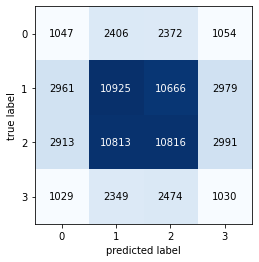

In [77]:
clf = DecisionTreeClassifier()
clf.fit(train[train.label!=2][feats], train[train.label!=2]['label'])
pred = clf.predict(test[test.label!=2][feats])
make_report(pred, test[test.label!=2]['label'])

(array([ 21453.,      0., 104925.,      0.,      0.,      0.,      0.,
        104424.,      0.,  20875.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

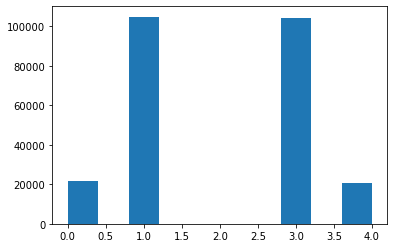

In [78]:
plt.hist(clf.predict(train[train.label==2][feats]))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.26      0.31      0.28      6879
         1.0       0.82      0.77      0.80     27531

    accuracy                           0.68     34410
   macro avg       0.54      0.54      0.54     34410
weighted avg       0.71      0.68      0.69     34410



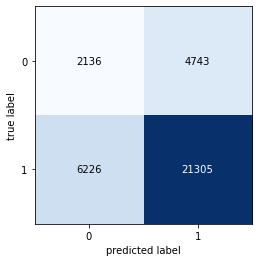

In [81]:
a = 0
b = 1
clf = DecisionTreeClassifier()
clf.fit(train[(train.label==a) | (train.label==b)][feats], train[(train.label==a) | (train.label==b)]['label'])
pred = clf.predict(test[(test.label==a) | (test.label==b)][feats])
make_report(pred, test[(test.label==a) | (test.label==b)]['label'])


Classification Report: 
              precision    recall  f1-score   support

         1.0       0.30      0.34      0.32     27531
         2.0       0.72      0.68      0.70     68954

    accuracy                           0.58     96485
   macro avg       0.51      0.51      0.51     96485
weighted avg       0.60      0.58      0.59     96485



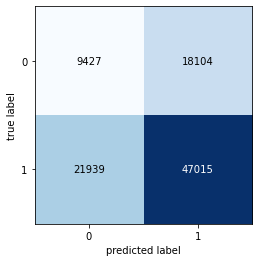

In [82]:
a = 1
b = 2
clf = DecisionTreeClassifier()
clf.fit(train[(train.label==a) | (train.label==b)][feats], train[(train.label==a) | (train.label==b)]['label'])
pred = clf.predict(test[(test.label==a) | (test.label==b)][feats])
make_report(pred, test[(test.label==a) | (test.label==b)]['label'])


Classification Report: 
              precision    recall  f1-score   support

         2.0       0.72      0.68      0.70     68954
         3.0       0.30      0.34      0.32     27533

    accuracy                           0.59     96487
   macro avg       0.51      0.51      0.51     96487
weighted avg       0.60      0.59      0.59     96487



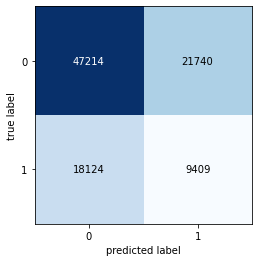

In [83]:
a = 2
b = 3
clf = DecisionTreeClassifier()
clf.fit(train[(train.label==a) | (train.label==b)][feats], train[(train.label==a) | (train.label==b)]['label'])
pred = clf.predict(test[(test.label==a) | (test.label==b)][feats])
make_report(pred, test[(test.label==a) | (test.label==b)]['label'])


Classification Report: 
              precision    recall  f1-score   support

         3.0       0.82      0.78      0.80     27533
         4.0       0.26      0.31      0.29      6882

    accuracy                           0.69     34415
   macro avg       0.54      0.55      0.54     34415
weighted avg       0.71      0.69      0.70     34415



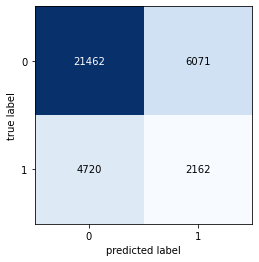

In [84]:
a = 3
b = 4
clf = DecisionTreeClassifier()
clf.fit(train[(train.label==a) | (train.label==b)][feats], train[(train.label==a) | (train.label==b)]['label'])
pred = clf.predict(test[(test.label==a) | (test.label==b)][feats])
make_report(pred, test[(test.label==a) | (test.label==b)]['label'])

In [85]:
train

id     era data_type  feature_intelligence1  \
0       n000315175b67977    era1     train                   0.00   
1       n0014af834a96cdd    era1     train                   0.00   
2       n001c93979ac41d4    era1     train                   0.25   
3       n0034e4143f22a13    era1     train                   1.00   
4       n00679d1a636062f    era1     train                   0.25   
...                  ...     ...       ...                    ...   
501803  nff6a8a8feaeeb52  era120     train                   0.50   
501804  nff6af62a0996372  era120     train                   1.00   
501805  nff9288983b8c040  era120     train                   0.75   
501806  nffaab4e1cacc4b1  era120     train                   0.25   
501807  nffba5460b572cfa  era120     train                   0.75   

        feature_intelligence2  feature_intelligence3  feature_intelligence4  \
0                        0.50                   0.25                   0.00   
1                        0.00                   0.00                   0.25   
2                        0.50                   0.25                   0.25   
3                        0.00                   0.00                   0.50   
4                        0.25                   0.25                   0.25   
...                       ...                    ...                    ...   
501803                   0.50                   0.25                   0.00   
501804                   0.00                   0.00                   1.00   
501805                   0.50                   0.50                   0.50   
501806                   0.25                   0.25                   0.50   
501807                   0.50                   0.50                   0.75   

        feature_intelligence5  feature_intelligence6  feature_intelligence7  \
0                        0.50                   0.25                   0.25   
1                        0.50                   0.00                   0.00   
2                        1.00                   0.75                   0.75   
3                        0.50                   0.25                   0.25   
4                        0.00                   0.25                   0.50   
...                       ...                    ...                    ...   
501803                   0.00                   0.50                   0.75   
501804                   0.50                   0.75                   0.75   
501805                   0.25                   0.50                   0.25   
501806                   0.00                   1.00                   1.00   
501807                   0.75                   0.00                   0.00   

        feature_intelligence8  feature_intelligence9  feature_intelligence10  \
0                        0.25                   0.75                    0.75   
1                        0.25                   0.50                    0.50   
2                        0.25                   0.00                    0.25   
3                        0.75                   0.25                    0.50   
4                        0.25                   0.25                    0.50   
...                       ...                    ...                     ...   
501803                   0.00                   0.75                    0.75   
501804                   1.00                   0.00                    0.00   
501805                   0.50                   0.25                    0.25   
501806                   0.50                   0.25                    0.25   
501807                   0.75                   0.00                    0.00   

        feature_intelligence11  feature_intelligence12  feature_charisma1  \
0                         0.25                    0.25               1.00   
1                         0.00                    0.50               0.00   
2                         0.50                    1.00               0.50   
3                         

In [86]:
train.describe()

feature_intelligence1  feature_intelligence2  feature_intelligence3  \
count          501808.000000          501808.000000          501808.000000   
mean                0.499981               0.499979               0.499979   
std                 0.353596               0.353593               0.353593   
min                 0.000000               0.000000               0.000000   
25%                 0.250000               0.250000               0.250000   
50%                 0.500000               0.500000               0.500000   
75%                 0.750000               0.750000               0.750000   
max                 1.000000               1.000000               1.000000   

       feature_intelligence4  feature_intelligence5  feature_intelligence6  \
count          501808.000000          501808.000000          501808.000000   
mean                0.499981               0.499977               0.499977   
std                 0.353596               0.353587               0.353587   
min                 0.000000               0.000000               0.000000   
25%                 0.250000               0.250000               0.250000   
50%                 0.500000               0.500000               0.500000   
75%                 0.750000               0.750000               0.750000   
max                 1.000000               1.000000               1.000000   

       feature_intelligence7  feature_intelligence8  feature_intelligence9  \
count          501808.000000          501808.000000          501808.000000   
mean                0.499977               0.499981               0.499980   
std                 0.353587               0.353596               0.352099   
min                 0.000000               0.000000               0.000000   
25%                 0.250000               0.250000               0.250000   
50%                 0.500000               0.500000               0.500000   
75%                 0.750000               0.750000               0.750000   
max                 1.000000               1.000000               1.000000   

       feature_intelligence10  feature_intelligence11  feature_intelligence12  \
count           501808.000000           501808.000000           501808.000000   
mean                 0.499980                0.499981                0.499977   
std                  0.352099                0.353596                0.353587   
min                  0.000000                0.000000                0.000000   
25%                  0.250000                0.250000                0.250000   
50%                  0.500000                0.500000                0.500000   
75%                  0.750000                0.750000                0.750000   
max                  1.000000                1.000000                1.000000   

       feature_charisma1  feature_charisma2  feature_charisma3  \
count      501808.000000      501808.000000      501808.000000   
mean            0.499968           0.499976           0.499974   
std             0.352986           0.334986           0.337437   
min             0.000000           0.000000           0.000000   
25%             0.250000           0.250000           0.250000   
50%             0.500000           0.500000           0.500000   
75%             0.750000           0.750000           0.750000   
max             1.000000           1.000000           1.000000   

       feature_charisma4  feature_charisma5  feature_charisma6  \
count      501808.000000      501808.000000      501808.000000   
mean            0.499977           0.499976           0.499971   
std             0.338557           0.313514           0.353014   
min             0.000000           0.000000           0.000000   
25%             0.250000           0.250000           0.250000   
50%             0.500000           0.500000           0.500000   
75%             0.750000           0.750000           0.750000   
max             1.000000           1.000000  

In [93]:
a = train[train.label == 0]
a = a.append(train[train.label == 1].sample(15000, random_state=42))
a = a.append(train[train.label == 2].sample(10000, random_state=42))
a = a.append(train[train.label == 3].sample(15000, random_state=42))
a = a.append(train[train.label == 4])


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.06      0.30      0.11      6879
         1.0       0.20      0.19      0.19     27531
         2.0       0.57      0.17      0.26     68954
         3.0       0.19      0.19      0.19     27533
         4.0       0.07      0.31      0.11      6882

    accuracy                           0.19    137779
   macro avg       0.22      0.23      0.17    137779
weighted avg       0.37      0.19      0.22    137779



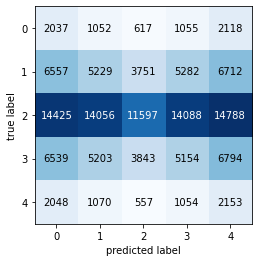

In [94]:
clf = DecisionTreeClassifier()
clf.fit(a[feats], a['label'])
pred = clf.predict(test[feats])
make_report(pred, test['label'])

# NET

In [3]:
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [33]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x.values).float()
        self.y = torch.tensor(y.values).long()

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]
        return(x, y)
    
BATCH_SIZE = 256    
train_dataset = MyDataset(train[feats], train['label'])
dataLoader_train = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True)

test_dataset = MyDataset(test[feats], test['label'])
dataLoader_test = torch.utils.data.DataLoader(test_dataset,
                                              batch_size=BATCH_SIZE,
                                              shuffle=True)

In [38]:
class Model(torch.nn.Module):
    
    def __init__(self, input_shape):
        super().__init__()
        
        self.conv = torch.nn.Sequential(
            torch.nn.Conv1d(1, 256, 5),
            torch.nn.ReLU(),
#             torch.nn.Conv1d(1, 256,5),
#             torch.nn.ReLU(),
        )
        
        self.flatten = torch.nn.Sequential(torch.nn.AdaptiveMaxPool1d(1), torch.nn.Flatten())
        
        self.fc = torch.nn.Sequential(
            torch.nn.ReLU(),
            torch.nn.Linear(256, 5),
        )
        
    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x
    
model = Model(len(feats))
print(model)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)

Model(
  (conv): Sequential(
    (0): Conv1d(1, 256, kernel_size=(5,), stride=(1,))
    (1): ReLU()
  )
  (flatten): Sequential(
    (0): AdaptiveMaxPool1d(output_size=1)
    (1): Flatten(start_dim=1, end_dim=-1)
  )
  (fc): Sequential(
    (0): ReLU()
    (1): Linear(in_features=256, out_features=5, bias=True)
  )
)


In [39]:
n_epochs = 10
print('started!')
for epoch in range(n_epochs):
    train_batch_loss = 0
    model.train()
    for step, batch in enumerate(dataLoader_train):
        x = batch[0]
        y = batch[1]
        x = x.unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(x = x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        train_batch_loss += loss.item()
        optimizer.step()
        optimizer.zero_grad()

    test_batch_loss = 0
    model.eval()
    with torch.no_grad():
        for step, batch in enumerate(dataLoader_test):
            x = batch[0]
            y = batch[1]
            x = x.unsqueeze(1)
            outputs = model(x = x)
            loss = criterion(outputs, y)
            test_batch_loss += loss.item()

    print('epoch {}/{} finished with train loss: {} and test loss: {}'.format(epoch+1, n_epochs,
                                                                              train_batch_loss / len(dataLoader_train),
                                                                              test_batch_loss / len(dataLoader_test)))
torch.save(model.state_dict(), './model_two_input')

started!
epoch 1/10 finished with train loss: 1.2806938938313999 and test loss: 1.2683333481397612
epoch 2/10 finished with train loss: 1.2751716581429224 and test loss: 1.271874274305156
epoch 3/10 finished with train loss: 1.2745362805931133 and test loss: 1.2693557801184716
epoch 4/10 finished with train loss: 1.2742652409177602 and test loss: 1.267664607690305
epoch 5/10 finished with train loss: 1.2738433708529397 and test loss: 1.2685914004225014
epoch 6/10 finished with train loss: 1.2739113095705148 and test loss: 1.2685656728903747
epoch 7/10 finished with train loss: 1.2738674873602993 and test loss: 1.267589208809918
epoch 8/10 finished with train loss: 1.273878046470537 and test loss: 1.267319800902386
epoch 9/10 finished with train loss: 1.27393921688465 and test loss: 1.267364300690688
epoch 10/10 finished with train loss: 1.2737680308251038 and test loss: 1.2687691717731708
